In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/Deep Learning Practice/Churn_Modelling.csv')

In [37]:
train_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
x = train_data.drop(['Exited'],axis = 1)
y = train_data['Exited']

In [39]:
#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [40]:
x=pd.concat([x,geography,gender],axis=1)

In [41]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [42]:
x = x.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [43]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [45]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [47]:
classifier = Sequential()

In [48]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [62]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3339 - accuracy: 0.8595 - val_loss: 0.3629 - val_accuracy: 0.8493
Epoch 2/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3336 - accuracy: 0.8602 - val_loss: 0.3625 - val_accuracy: 0.8489
Epoch 3/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3333 - accuracy: 0.8597 - val_loss: 0.3626 - val_accuracy: 0.8501
Epoch 4/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3332 - accuracy: 0.8608 - val_loss: 0.3622 - val_accuracy: 0.8501
Epoch 5/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3329 - accuracy: 0.8593 - val_loss: 0.3622 - val_accuracy: 0.8501
Epoch 6/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3330 - accuracy: 0.8600 - val_loss: 0.3620 - val_accuracy: 0.8504
Epoch 7/10
536/536 [==============================] - 2s 3ms/step - loss: 0.3326 - accuracy: 0.8600 - val_loss: 0.3621 - val_accuracy: 0.8489
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


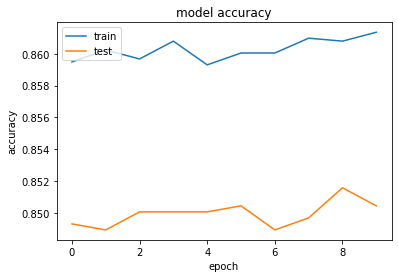

In [63]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

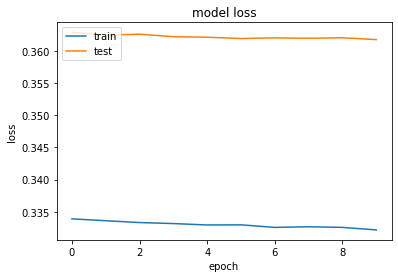

In [64]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [58]:
model_history.history

{'accuracy': [0.7811158895492554],
 'loss': [0.573015034198761],
 'val_accuracy': [0.7955319881439209],
 'val_loss': [0.5348427891731262]}